In [1]:
from google.colab import files
uploaded = files.upload()

Saving GlobalLandTemperaturesByCountry.csv to GlobalLandTemperaturesByCountry.csv


In [19]:
import pandas as pd
import numpy as np

In [20]:
GlobalLandTemperaturesByCountry = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
GlobalLandTemperaturesByCountry = GlobalLandTemperaturesByCountry.dropna()
GlobalLandTemperaturesByCountry

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


Bootstrap Sampling

Choose Country

In [21]:
country1000=(GlobalLandTemperaturesByCountry['Country'].value_counts())
print(country1000)
country1000=country1000[country1000>1000]
country1000.keys()

Austria                                3166
Åland                                  3166
Czech Republic                         3166
Faroe Islands                          3166
Finland                                3166
                                       ... 
Federated States Of Micronesia         1364
Guam                                   1328
Northern Mariana Islands               1328
French Southern And Antarctic Lands     783
Heard Island And Mcdonald Islands       783
Name: Country, Length: 242, dtype: int64


Index(['Austria', 'Åland', 'Czech Republic', 'Faroe Islands', 'Finland',
       'France', 'Macedonia', 'Croatia', 'Belarus', 'France (Europe)',
       ...
       'Papua New Guinea', 'Solomon Islands', 'Kingman Reef', 'Palmyra Atoll',
       'Kiribati', 'Palau', 'South Georgia And The South Sandwich Isla',
       'Federated States Of Micronesia', 'Guam', 'Northern Mariana Islands'],
      dtype='object', length=240)

Get data with only Gernabt country

In [22]:
samplingData=GlobalLandTemperaturesByCountry[GlobalLandTemperaturesByCountry['Country']=='Germany']
samplingData

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
201440,1743-11-01,5.468,1.832,Germany
201445,1744-04-01,8.438,2.746,Germany
201446,1744-05-01,11.498,1.530,Germany
201447,1744-06-01,14.262,1.639,Germany
201448,1744-07-01,16.293,1.683,Germany
...,...,...,...,...
204673,2013-04-01,8.213,0.233,Germany
204674,2013-05-01,12.151,0.263,Germany
204675,2013-06-01,15.927,0.253,Germany
204676,2013-07-01,19.762,0.196,Germany


PART 1 Bootstrap Function 

In [6]:
sampleMean=[]
sampleStd=[]
def Bootstrap(data,times):
  for i in range(0,times):
    samples=np.random.choice(data, replace=True, size=len(data))
    sampleMean.append(samples.mean())
    sampleStd.append(samples.std())
Bootstrap(samplingData['AverageTemperature'],40)

***PART 2***

JackKnife Function (Run this in stead of Bootstrap)

In [23]:
sampleMean=[]
sampleStd=[]
def JackKnife(data,times):
  for i in range(0,times):
    samples=np.random.choice(data, size=len(data)-1)
    sampleMean.append(samples.mean())
    sampleStd.append(samples.std())
JackKnife(samplingData['AverageTemperature'],40)

**CALCULATING PART **

MEAN, STANDARD DEVIATION

In [24]:
bootMean=np.mean(sampleMean)
bootStd=np.mean(sampleStd)

bootMean, bootStd

(8.16107912322275, 6.905829918487032)

PLOT

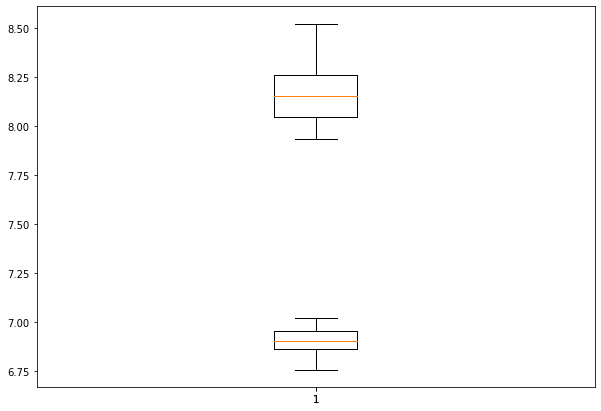

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
 #BoxPlot
# Creating plot
plt.boxplot(sampleMean)
plt.boxplot(sampleStd)

# show plot
plt.show()

<BarContainer object of 40 artists>

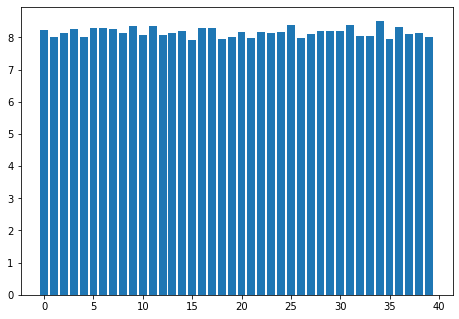

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axes=list(range(0,40))
ax.bar(x_axes,sampleMean)

<BarContainer object of 40 artists>

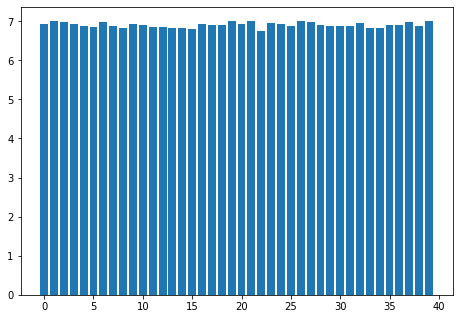

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axes=list(range(0,40))
ax.bar(x_axes,sampleStd)

STANDARD ERROR

In [29]:
from scipy.stats import sem
sem(sampleStd)

0.010032273001327526

In [30]:
sem(sampleMean)

0.021912788815913124

***PART 1 CONFIDENT INTERVAL***

Confident Intervals of Mean

In [13]:
np.percentile(sampleMean, [2.5, 97.5])

array([7.91392252, 8.38280502])

Confident Intervals of Standard Deviation


In [14]:
np.percentile(sampleStd, [2.5, 97.5])

array([6.79330496, 6.99297129])

***JackKnifeConfident Interval***

In [ ]:
meanVar = (41-1)*np.var(sampleMean)
stdVar=(41-1)*np.var(sampleStd)

meanVar, stdVar

(0.710456882232612, 0.11690339149801035)

MEAN

In [ ]:
# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = sampleMean - 1.96 * np.sqrt(meanVar)
jk_upper_ci = sampleMean + 1.96 * np.sqrt(meanVar)

jk_lower_ci, jk_upper_ci

(array([6.29440198, 6.5213028 , 6.60093167, 6.2373625 , 6.55518688,
        6.42637292, 6.50674121, 6.51587292, 6.61379901, 6.53707696,
        6.35221752, 6.3353884 , 6.62672194, 6.38320709, 6.50665435,
        6.4146196 , 6.65905769, 6.5168028 , 6.58500495, 6.66384702,
        6.7178745 , 6.69171436, 6.63801411, 6.74474468, 6.65409876,
        6.68732807, 6.65109528, 6.50011676, 6.42317077, 6.45868404,
        6.35767488, 6.42593641, 6.59807507, 6.3888366 , 6.44973931,
        6.64348284, 6.49689377, 6.2316215 , 6.50338018, 6.32841145]),
 array([ 9.59851527,  9.82541609,  9.90504496,  9.54147579,  9.85930017,
         9.73048621,  9.8108545 ,  9.81998621,  9.9179123 ,  9.84119025,
         9.65633081,  9.63950169,  9.93083523,  9.68732038,  9.81076764,
         9.71873289,  9.96317099,  9.82091609,  9.88911824,  9.96796031,
        10.02198779,  9.99582765,  9.9421274 , 10.04885797,  9.95821205,
         9.99144136,  9.95520857,  9.80423005,  9.72728406,  9.76279733,
         9.66178

STANDARD DEVIATION 

In [ ]:
# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = sampleStd - 1.96 * np.sqrt(stdVar)
jk_upper_ci = sampleStd + 1.96 * np.sqrt(stdVar)

jk_lower_ci, jk_upper_ci

(array([6.2192304 , 6.21053982, 6.22549757, 6.35488613, 6.10279949,
        6.23558823, 6.2273856 , 6.25954704, 6.30801586, 6.3438133 ,
        6.19183891, 6.28515171, 6.21271444, 6.27179591, 6.21227985,
        6.18107727, 6.23174495, 6.1954866 , 6.24242814, 6.30494322,
        6.21467953, 6.292562  , 6.23719099, 6.27792448, 6.27961445,
        6.2523994 , 6.2382071 , 6.272988  , 6.27074341, 6.24408535,
        6.21355371, 6.3206505 , 6.21028288, 6.24295398, 6.20418347,
        6.14599918, 6.24041771, 6.31243463, 6.25258365, 6.10368525]),
 array([7.55952301, 7.55083243, 7.56579018, 7.69517874, 7.4430921 ,
        7.57588084, 7.56767821, 7.59983965, 7.64830847, 7.68410591,
        7.53213152, 7.62544431, 7.55300705, 7.61208852, 7.55257246,
        7.52136988, 7.57203755, 7.53577921, 7.58272075, 7.64523583,
        7.55497214, 7.63285461, 7.5774836 , 7.61821709, 7.61990706,
        7.59269201, 7.5784997 , 7.61328061, 7.61103602, 7.58437796,
        7.55384631, 7.6609431 , 7.55057548, 7.